# Predict Rating Average

To develop a machine learning model to categorize books into rating average groups based on its various features.

**Predicting book rating classifications is important because it:**

- Enables personalized book recommendations for readers.
- Helps publishers focus marketing efforts on target audiences.
- Guides content creation and improves overall reader satisfaction.

## 1. Importing and Loading Dataset

In [1]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download -d sp1thas/book-depository-dataset/

100% 409M/409M [00:05<00:00, 39.9MB/s]
100% 409M/409M [00:05<00:00, 76.1MB/s]


In [3]:
!unzip /content/book-depository-dataset.zip

Archive:  /content/book-depository-dataset.zip
  inflating: authors.csv             
  inflating: categories.csv          
  inflating: dataset.csv             
  inflating: formats.csv             
  inflating: places.csv              


## 2. EDA

In [4]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/content/dataset.csv')
df.head()

,authors,bestsellers-rank,categories,description,dimension-x,dimension-y,dimension-z,edition,edition-statement,for-ages,...,isbn10,isbn13,lang,publication-date,publication-place,rating-avg,rating-count,title,url,weight
0,[1],49848.0,"[214, 220, 237, 2646, 2647, 2659, 2660, 2679]",SOLDIER FIVE is an elite soldier's explosive m...,129.0,198.0,20.0,NaN,NaN,NaN,...,184018907X,9781840189070,en,2004-10-14 00:00:00,NaN,4.03,292.0,Soldier Five : The Real Truth About The Bravo ...,/Soldier-Five-Mike-Coburn/9781840189070,224.00
1,"[2, 3]",115215.0,"[235, 3386]",John Moran and Carl Williams were the two bigg...,127.0,203.2,25.4,NaN,NaN,NaN,...,184454737X,9781844547371,en,2009-03-13 00:00:00,NaN,3.60,335.0,Underbelly : The Gangland War,/Underbelly-Andrew-Rule/9781844547371,285.76
2,[4],11732.0,"[358, 2630, 360, 2632]",Sir Phillip knew that Eloise Bridgerton was a ...,150.0,224.0,28.0,New edition,NaN,NaN,...,8416327866,9788416327867,es,2020-04-30 00:00:00,NaN,3.88,37211.0,"A Sir Phillip, Con Amor",/Sir-Phillip-Con-Amor-Julia-Quinn/9788416327867,386.00
3,"[5, 6, 7, 8]",114379.0,"[377, 2978, 2980]",The Third Book of General Ignorance gathers t...,153.0,234.0,24.0,NaN,Export - Airside ed,NaN,...,571308996,9780571308996,en,2015-10-01 00:00:00,NaN,4.17,384.0,QI: The Third Book of General Ignorance,/QI-Third-Book-General-Ignorance-John-Lloyd/97...,436.00
4,[9],98413.0,"[2813, 2980]",The Try Guys deliver their first book-an inspi...,191.0,240.0,29.0,NaN,NaN,NaN,...,8352518,9780008352516,en,2019-06-18 00:00:00,NaN,3.90,5095.0,The Hidden Power of F*cking Up,/Hidden-Power-F-cking-Up-Try-Guys/9780008352516,980.00


In [8]:
category = pd.read_csv('/content/categories.csv')
category.head()

,category_id,category_name
0,1998,.Net Programming
1,176,20th Century & Contemporary Classical Music
2,3291,20th Century & Contemporary Classical Music
3,2659,20th Century History: C 1900 To C 2000
4,2661,21st Century History: From C 2000 -


In [ ]:
df.dtypes

authors                object
bestsellers-rank      float64
categories             object
description            object
dimension-x           float64
dimension-y           float64
dimension-z           float64
edition                object
edition-statement      object
for-ages               object
format                float64
id                      int64
illustrations-note     object
image-checksum         object
image-path             object
image-url              object
imprint                object
index-date            float64
isbn10                 object
isbn13                  int64
lang                   object
publication-date       object
publication-place     float64
rating-avg            float64
rating-count          float64
title                  object
url                    object
weight                float64
dtype: object

## **Data Preprocessing**

### 1 Clustering Categories

We used clustering method to group book categories into 10 broader clusters. This was done to simplify the management of categories and ease the preprocessing tasks. Afterwards, we mapped each category to its respective cluster ID.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Assuming you have a dataframe 'categories' with columns 'category_id' and 'category_name'
# and a dataframe 'books' with columns 'book_id' and 'category_ids'

# 1. Transform category names to numerical features
tfidf_vectorizer = TfidfVectorizer()
category_features = tfidf_vectorizer.fit_transform(category['category_name'])

# category_features

# 2. Calculate similarity and cluster
num_clusters = 10  # Adjust this based on your dataset
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(category_features)

# 3. Create a mapping between original category IDs and cluster IDs
category_cluster_mapping = dict(zip(category['category_id'], kmeans.labels_))

# category_cluster_mapping

import ast
df['categories'] = df['categories'].apply(lambda x: ast.literal_eval(x))

# 4. Apply aggregation to book categories
df['category_cluster_id'] = df['categories'].apply(lambda x: [category_cluster_mapping[c] for c in x])

# def map_category_clusters(category_ids):
#     cluster_ids = []
#     for category_id in category_ids:
#         print(category_id)
#         # cluster_ids.append(category_cluster_mapping[category_id])
#     return cluster_ids

# df['category_cluster_id'] = df['categories'].apply(map_category_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [10]:
# Get the cluster labels for each category
category_labels = kmeans.labels_

# Create a mapping between cluster labels and category names
cluster_category_mapping = {}
for category_id, cluster_label in zip(category['category_id'], category_labels):
    if cluster_label not in cluster_category_mapping:
        cluster_category_mapping[cluster_label] = []
    cluster_category_mapping[cluster_label].append(category[category['category_id'] == category_id]['category_name'].values[0])

# Print the categories within each cluster
for cluster_label, category_names in cluster_category_mapping.items():
    print(f"Cluster {cluster_label}: {', '.join(category_names)}")


Cluster 1: .Net Programming, 20th Century & Contemporary Classical Music, 20th Century & Contemporary Classical Music, 3D Graphics & Modelling, ABC, Abnormal Psychology, Access, Accident & Emergency Medicine, Accident & Emergency Nursing, Accounting, Accounting Software, Acoustic & Sound Engineering, Acquisitions & Collection Development, Acting Techniques, Active Outdoor Pursuits, Addiction & Therapy, Admissions Procedures, Admissions Procedures, Adoption, Adoption & Fostering, Adult & Contemporary Romance, Adult & Contemporary Romance, Adventure Holidays, Advertising, Advertising & Society, Advertising Industry, Advice On Careers & Achieving Success, Advice On Parenting, Advocacy, Aerial Photography, Aerodynamics, Aerospace & Air Transport Industries, Aerospace & Aviation Technology, Afghan War, Age Groups, Age Groups: Adolescents, Age Groups: Adults, Age Groups: Children, Age Groups: The Elderly, Agile Programming, Agnosticism & Atheism, Agricultural Engineering & Machinery, Agricul

In [ ]:
df.shape

(1109383, 29)

In [ ]:
df.describe()

,bestsellers-rank,dimension-x,dimension-y,dimension-z,format,id,index-date,isbn13,publication-place,rating-avg,rating-count,weight
count,6.425410e+05,1.061156e+06,1.015852e+06,1.061156e+06,1.102761e+06,1.109383e+06,0.0,1.109383e+06,0.0,669253.000000,6.692530e+05,1.022210e+06
mean,9.209777e+05,1.607659e+02,2.249102e+02,2.644117e+01,1.774440e+00,9.781658e+12,NaN,9.781658e+12,NaN,3.974918,1.239215e+04,4.616623e+02
std,8.642210e+05,3.802671e+01,4.347322e+01,4.779869e+01,2.124599e+00,1.747523e+09,NaN,1.747523e+09,NaN,0.543605,1.333263e+05,6.587618e+02
min,1.001000e+03,2.500000e-01,1.000000e+00,1.000000e-01,1.000000e+00,9.780000e+12,NaN,9.780000e+12,NaN,1.000000,1.000000e+00,1.500000e+01
25%,1.654890e+05,1.380000e+02,2.030000e+02,9.000000e+00,1.000000e+00,9.780801e+12,NaN,9.780801e+12,NaN,3.730000,5.000000e+00,1.814400e+02
50%,6.646830e+05,1.520000e+02,2.290000e+02,1.575000e+01,1.000000e+00,9.781474e+12,NaN,9.781474e+12,NaN,4.000000,3.900000e+01,3.180000e+02
75%,1.455812e+06,1.780000e+02,2.420000e+02,2.500000e+01,2.000000e+00,9.781743e+12,NaN,9.781743e+12,NaN,4.260000,5.200000e+02,5.352400e+02
max,3.679776e+06,3.871000e+03,2.000000e+03,2.000000e+03,4.900000e+01,9.798389e+12,NaN,9.798389e+12,NaN,5.000000,7.377337e+06,8.252200e+04


In [ ]:
df.isnull().sum()

authors                      0
bestsellers-rank        466842
categories                   0
description              80087
dimension-x              48227
dimension-y              93531
dimension-z              48227
edition                 926569
edition-statement       747261
for-ages               1033390
format                    6622
id                           0
illustrations-note      752907
image-checksum              27
image-path                  27
image-url                   27
imprint                 830049
index-date             1109383
isbn10                       0
isbn13                       0
lang                     60407
publication-date          2603
publication-place      1109383
rating-avg              440130
rating-count            440130
title                        0
url                          0
weight                   87173
category_cluster_id          0
dtype: int64

In [ ]:
df.columns

Index(['authors', 'bestsellers-rank', 'categories', 'description',
       'dimension-x', 'dimension-y', 'dimension-z', 'edition',
       'edition-statement', 'for-ages', 'format', 'id', 'illustrations-note',
       'image-checksum', 'image-path', 'image-url', 'imprint', 'index-date',
       'isbn10', 'isbn13', 'lang', 'publication-date', 'publication-place',
       'rating-avg', 'rating-count', 'title', 'url', 'weight',
       'category_cluster_id'],
      dtype='object')

In [11]:
df = df[['bestsellers-rank',
       'dimension-x', 'dimension-y', 'dimension-z', 'format', 'id',
       'isbn10', 'isbn13', 'lang', 'publication-date',
       'rating-avg', 'rating-count', 'weight',
       'category_cluster_id']]

In [12]:
df = df.dropna()

In [ ]:
df.shape

(518489, 14)

### 2 One-Hot Encoding

Doing one-hot encoding between all categories and all cluster in order to make data numeric which is essential part for data pre processing

In [13]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

df_expanded = df.explode('category_cluster_id')

one_hot_encoded = pd.get_dummies(df_expanded, columns=['category_cluster_id'], prefix='', prefix_sep='')

one_hot_encoded = one_hot_encoded[['0',
       '1', '2', '3', '4', '5', '6', '7', '8', '9']]

# Sum up the one-hot encoded columns for each original row
one_hot_encoded = one_hot_encoded.groupby(level=0).sum()

# Replace non-zero values with 1
one_hot_encoded = one_hot_encoded.applymap(lambda x: 1 if x != 0 else 0)

# Combine the one-hot encoded DataFrame with the original DataFrame
final_df = pd.concat([df, one_hot_encoded], axis=1)

print(final_df)


<ipython-input-13-b3f05bc474a8>:9: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  one_hot_encoded = pd.get_dummies(df_expanded, columns=['category_cluster_id'], prefix='', prefix_sep='')


         bestsellers-rank  dimension-x  dimension-y  dimension-z  format  \
0                 49848.0        129.0        198.0         20.0     1.0   
1                115215.0        127.0        203.2         25.4     1.0   
2                 11732.0        150.0        224.0         28.0     1.0   
3                114379.0        153.0        234.0         24.0     1.0   
4                 98413.0        191.0        240.0         29.0     2.0   
...                   ...          ...          ...          ...     ...   
1109283         1917273.0        126.0        196.0         25.0     1.0   
1109292         2203828.0        152.0        229.0         17.0     2.0   
1109297         1823340.0        129.0        198.0         16.0     1.0   
1109350         2780555.0        216.0        279.0          8.0     1.0   
1109358         1058346.0        153.0        234.0         28.0     2.0   

                    id      isbn10         isbn13 lang     publication-date  \
0       

In [14]:
df = final_df
df

,bestsellers-rank,dimension-x,dimension-y,dimension-z,format,id,isbn10,isbn13,lang,publication-date,...,0,1,2,3,4,5,6,7,8,9
0,49848.0,129.0,198.0,20.0,1.0,9781840189070,184018907X,9781840189070,en,2004-10-14 00:00:00,...,0,1,0,0,0,0,0,1,0,0
1,115215.0,127.0,203.2,25.4,1.0,9781844547371,184454737X,9781844547371,en,2009-03-13 00:00:00,...,0,1,1,0,0,0,0,0,0,0
2,11732.0,150.0,224.0,28.0,1.0,9788416327867,8416327866,9788416327867,es,2020-04-30 00:00:00,...,0,1,1,0,0,0,0,0,0,0
3,114379.0,153.0,234.0,24.0,1.0,9780571308996,571308996,9780571308996,en,2015-10-01 00:00:00,...,0,1,1,0,0,0,0,0,0,0
4,98413.0,191.0,240.0,29.0,2.0,9780008352516,8352518,9780008352516,en,2019-06-18 00:00:00,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109283,1917273.0,126.0,196.0,25.0,1.0,9780993179976,993179975,9780993179976,en,2016-04-28 00:00:00,...,0,1,0,0,0,0,1,0,0,0
1109292,2203828.0,152.0,229.0,17.0,2.0,9780262034418,262034417,9780262034418,en,2016-04-01 00:00:00,...,0,1,0,0,0,0,1,0,0,0
1109297,1823340.0,129.0,198.0,16.0,1.0,9780956946065,956946062,9780956946065,en,2014-10-03 00:00:00,...,0,1,0,0,0,0,0,0,0,0
1109350,2780555.0,216.0,279.0,8.0,1.0,9780692835913,692835911,9780692835913,en,2017-03-07 00:00:00,...,0,1,0,0,0,0,0,0,0,0


## 3 Formatting Date

Transforming the publishing date into a "days_difference" feature offers valuable insights into the book's recency. This allows readers to gauge how up-to-date the content is and assess its relevance to current knowledge.

In [15]:
from datetime import datetime
# Convert the "publication_date" column to datetime objects
df['publication-date'] = pd.to_datetime(df['publication-date'])

# Get the current date
current_date = datetime.now()

# Calculate the difference between the current date and "publication_date" for each row
df['days_difference'] = (current_date - df['publication-date']).dt.days

# Convert the result to integers
df['days_difference'] = df['days_difference'].astype(int)

print(df)

         bestsellers-rank  dimension-x  dimension-y  dimension-z  format  \
0                 49848.0        129.0        198.0         20.0     1.0   
1                115215.0        127.0        203.2         25.4     1.0   
2                 11732.0        150.0        224.0         28.0     1.0   
3                114379.0        153.0        234.0         24.0     1.0   
4                 98413.0        191.0        240.0         29.0     2.0   
...                   ...          ...          ...          ...     ...   
1109283         1917273.0        126.0        196.0         25.0     1.0   
1109292         2203828.0        152.0        229.0         17.0     2.0   
1109297         1823340.0        129.0        198.0         16.0     1.0   
1109350         2780555.0        216.0        279.0          8.0     1.0   
1109358         1058346.0        153.0        234.0         28.0     2.0   

                    id      isbn10         isbn13 lang publication-date  ...  \
0      

In [ ]:
# Define the thresholds for categorization
light_threshold = 500  # Define your own threshold for lightweight
heavy_threshold = 30000 # Define your own threshold for heavyweight

# Create a new column 'weight_category' based on the thresholds
df['weight_category'] = pd.cut(df['weight'], bins=[-float('inf'), light_threshold, heavy_threshold, float('inf')],
                                    labels=['1', '2', '3'])

# Convert the dtype of 'weight_category' to integer
df['weight_category'] = df['weight_category'].astype(int)

# Check the distribution of weight categories
weight_category_counts = df['weight_category'].value_counts()

print(weight_category_counts)

1    368908
2    149571
3        10
Name: weight_category, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'language' is the column you want to encode

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder to the language column and transform it
df['language_encoded'] = label_encoder.fit_transform(df['lang'])

# This will replace the 'language' column with 'language_encoded', which contains numerical values
df

,bestsellers-rank,dimension-x,dimension-y,dimension-z,format,id,isbn10,isbn13,lang,publication-date,...,3,4,5,6,7,8,9,days_difference,weight_category,language_encoded
0,49848.0,129.0,198.0,20.0,1.0,9781840189070,184018907X,9781840189070,en,2004-10-14,...,0,0,1,0,0,0,0,6952,1,20
1,115215.0,127.0,203.2,25.4,1.0,9781844547371,184454737X,9781844547371,en,2009-03-13,...,0,0,1,0,0,0,0,5341,1,20
2,11732.0,150.0,224.0,28.0,1.0,9788416327867,8416327866,9788416327867,es,2020-04-30,...,0,0,1,0,0,0,0,1275,1,22
3,114379.0,153.0,234.0,24.0,1.0,9780571308996,571308996,9780571308996,en,2015-10-01,...,0,0,1,0,0,0,0,2948,1,20
4,98413.0,191.0,240.0,29.0,2.0,9780008352516,8352518,9780008352516,en,2019-06-18,...,0,0,0,0,0,0,0,1592,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109283,1917273.0,126.0,196.0,25.0,1.0,9780993179976,993179975,9780993179976,en,2016-04-28,...,0,1,0,0,0,0,0,2738,1,20
1109292,2203828.0,152.0,229.0,17.0,2.0,9780262034418,262034417,9780262034418,en,2016-04-01,...,0,1,0,0,0,0,0,2765,1,20
1109297,1823340.0,129.0,198.0,16.0,1.0,9780956946065,956946062,9780956946065,en,2014-10-03,...,0,0,0,0,0,0,0,3311,1,20
1109350,2780555.0,216.0,279.0,8.0,1.0,9780692835913,692835911,9780692835913,en,2017-03-07,...,0,0,0,0,0,0,0,2425,1,20


In [ ]:
# Define the bins and labels
bins = [0, 1, 2, 3, 4, 5]
labels = [0, 1, 2, 3, 4]

# Use the cut function to classify the "rating-avg" column into 5 classes
df['rating-avg'] = pd.cut(df['rating-avg'], bins=bins, labels=labels)

print(df)

         bestsellers-rank  dimension-x  dimension-y  dimension-z  format  \
0                 49848.0        129.0        198.0         20.0     1.0   
1                115215.0        127.0        203.2         25.4     1.0   
2                 11732.0        150.0        224.0         28.0     1.0   
3                114379.0        153.0        234.0         24.0     1.0   
4                 98413.0        191.0        240.0         29.0     2.0   
...                   ...          ...          ...          ...     ...   
1109283         1917273.0        126.0        196.0         25.0     1.0   
1109292         2203828.0        152.0        229.0         17.0     2.0   
1109297         1823340.0        129.0        198.0         16.0     1.0   
1109350         2780555.0        216.0        279.0          8.0     1.0   
1109358         1058346.0        153.0        234.0         28.0     2.0   

                    id      isbn10         isbn13 lang publication-date  ...  \
0      

In [ ]:
df = df.drop(['publication-date', 'lang'], axis=1)

In [ ]:
df = df.drop(['weight'], axis=1)

In [ ]:
df = df.drop(['isbn10'], axis=1)

In [ ]:
df = df.drop(['category_cluster_id'], axis=1)

In [ ]:
df.columns

Index(['bestsellers-rank', 'dimension-x', 'dimension-y', 'dimension-z',
       'format', 'id', 'isbn13', 'rating-avg', 'rating-count', '0', '1', '2',
       '3', '4', '5', '6', '7', '8', '9', 'days_difference', 'weight_category',
       'language_encoded'],
      dtype='object')

In [ ]:
df['rating-avg'] = df['rating-avg'].astype(int)

In [ ]:
from sklearn import preprocessing

## Plot the boxplot

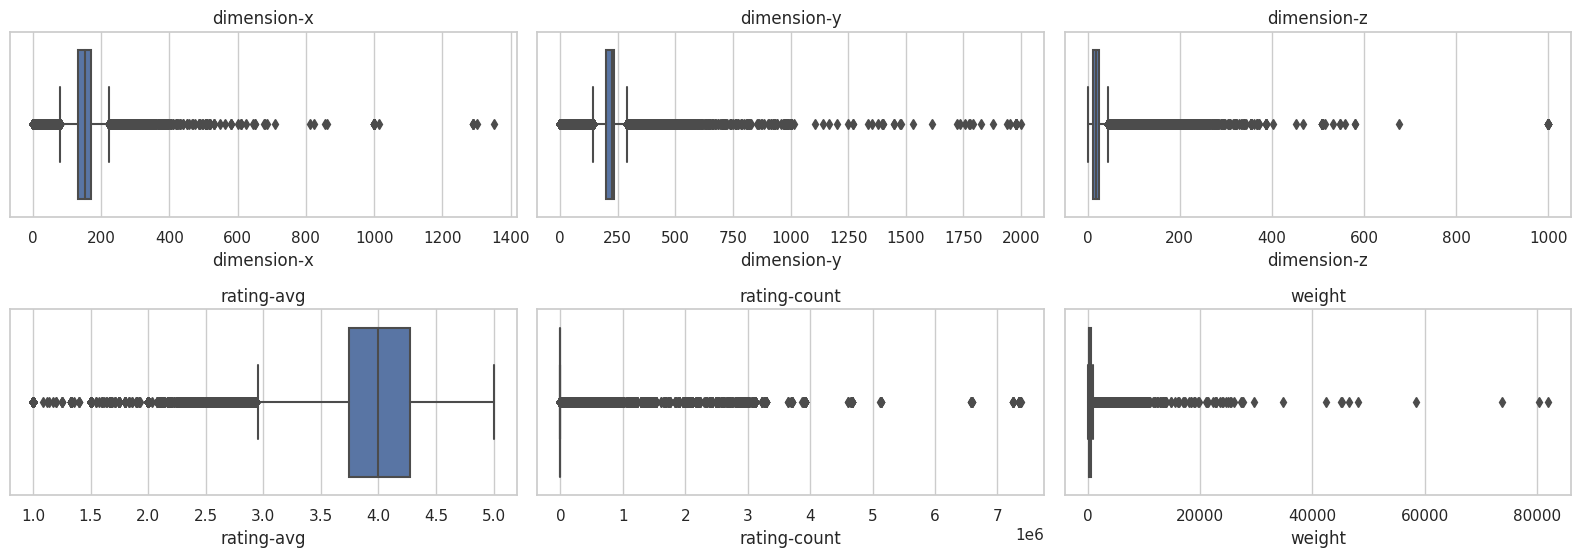

In [ ]:
# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(3, 3, figsize=(16, 8))

# Flatten the 2D axes array into a 1D array
axes = axes.flatten()

# Set the seaborn theme
sns.set_theme(style="whitegrid")

# List of columns to plot
columns_to_plot = ["dimension-x", "dimension-y", "dimension-z", "rating-avg", "rating-count", "weight"]

# Loop through the columns and plot each one
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)  # Set the title for each subplot

# Remove any empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

## Scatter Plot

Is there a correlation between weight and dimension-x?

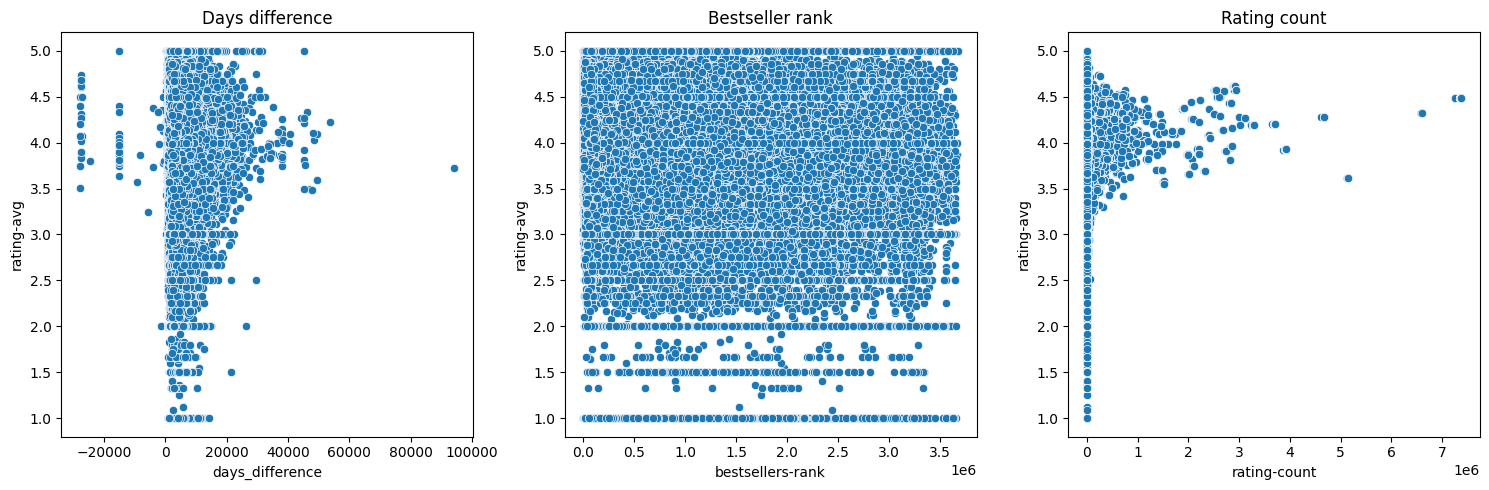

In [16]:
# Create a 1x3 grid for the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Scatterplot for dimension-x
sns.scatterplot(x=df["days_difference"], y=df["rating-avg"], ax=axes[0])
axes[0].set_title("Days difference")

# Scatterplot for dimension-y
sns.scatterplot(x=df["bestsellers-rank"], y=df["rating-avg"], ax=axes[1])
axes[1].set_title("Bestseller rank")

# Scatterplot for dimension-z
sns.scatterplot(x=df["rating-count"], y=df["rating-avg"], ax=axes[2])
axes[2].set_title("Rating count")

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

## Pie Charts

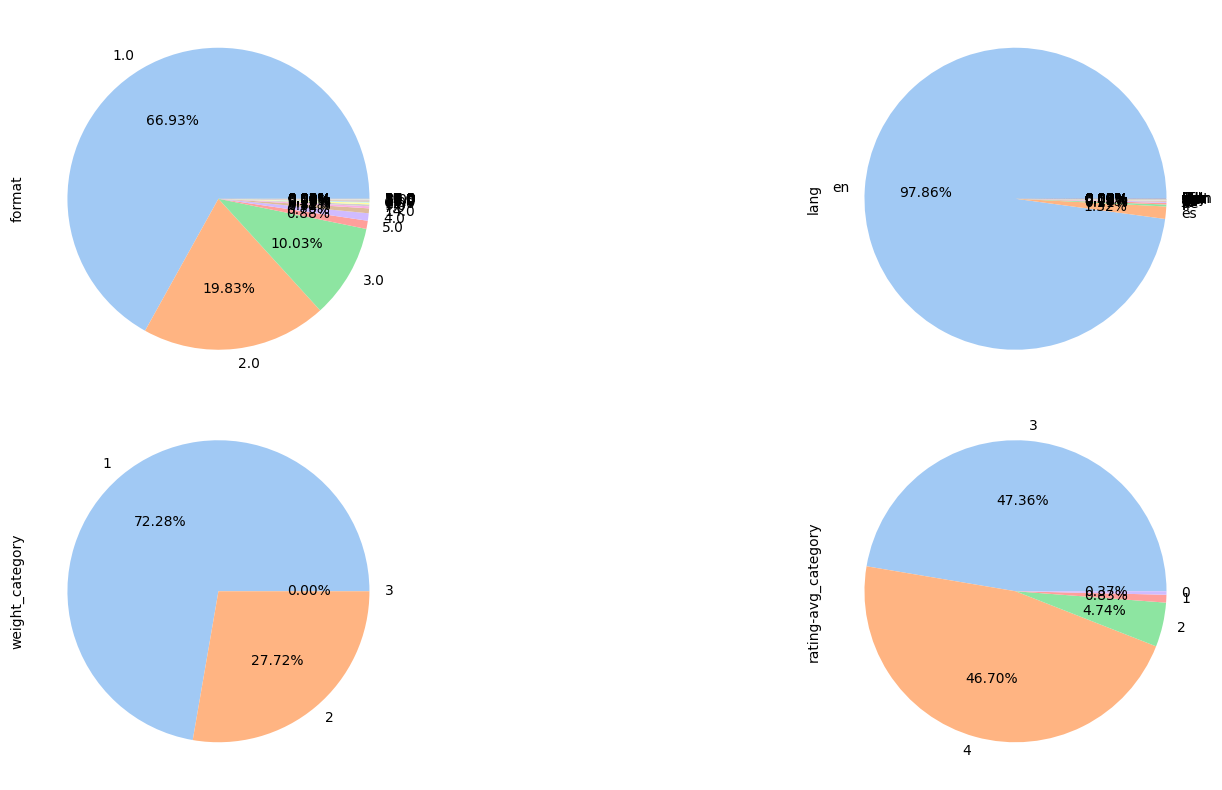

In [ ]:
# import matplotlib.pyplot as plt

# fig, ax = plt.subplots(2, 2, figsize=(15, 4))

# for axid, col in enumerate(["format", "lang", "weight_category", "rating-avg_category"]):
#     col_dist = df[col].value_counts()
#     piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
#     col_dist.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[axid])

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(20, 8))

for axid, col in enumerate(["format", "lang", "weight_category", "rating-avg_category"]):
    col_dist = df[col].value_counts()
    piec_colors = sns.color_palette('pastel')[0:len(col_dist)]
    ax_row, ax_col = divmod(axid, 2)  # Calculate row and column indices
    col_dist.plot(kind='pie', colors=piec_colors, autopct='%1.2f%%', ax=ax[ax_row, ax_col])

plt.tight_layout()
plt.show()



## Observations:
1. We found that most of the books belong to the light weight category whereas the heavy weight books are minimal in number.
2. Most of the books are given higher ratings like 3 and 4.
3. Most of the books are written in English language.

**Heat Map to find Correlation between target variable and other variables**

<ipython-input-28-67f08f3783e1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr(method='spearman')


<Axes: >

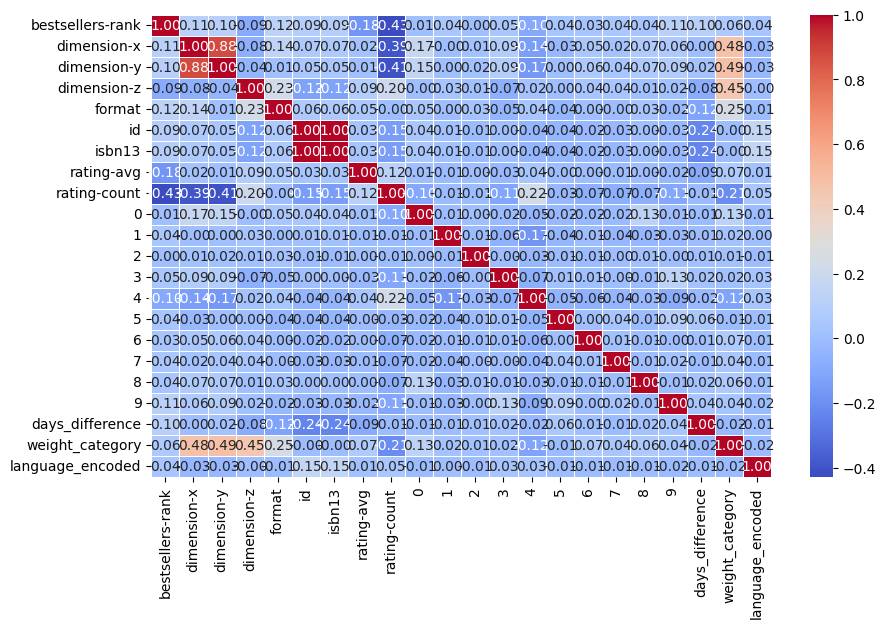

In [ ]:
corr_matrix = df.corr(method='spearman')
f, ax = plt.subplots(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4, annot_kws={"size": 10}, cmap='coolwarm',ax=ax)

In [ ]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [ ]:
final_df = df
final_df = final_df.drop(['rating-avg'],axis=1)

In [ ]:
final_wala_df = df.drop(['0', 'rating-avg', '1', '2', '3', '4', '5', '6', '7', '8', '9'],axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df, df["rating-avg"], random_state=42, test_size=0.20)

In [ ]:

size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((414791, 21), (103698, 21))

## Lasso Regression for feature selection

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models-------------------------
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

In [ ]:
# Create a range of alpha values
alphas = np.logspace(-4, 4, 100)

# Initialize a LassoCV model with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5)

# Fit the model to your data
lasso_cv.fit(X_train, y_train)

# Get the optimal alpha
optimal_alpha = lasso_cv.alpha_

print("Optimal Alpha:", optimal_alpha)

Optimal Alpha: 0.0001


In [ ]:
# Instantiate the Lasso model with an appropriate alpha (controls sparsity)
lasso = Lasso(alpha=0.0001)

# Fit the model to your data
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

[1.32598483e-07 7.56039429e-04 7.46226876e-04 2.18202856e-03
 9.06607119e-03 6.87231738e-12 8.78020677e-27 6.47656364e-08
 4.68904414e-02 5.85710222e-02 1.81281367e-02 4.58508813e-02
 1.22670554e-02 0.00000000e+00 3.58820628e-02 3.19277466e-02
 4.94773856e-02 1.37108722e-02 8.56545077e-06 6.82463841e-02
 1.16149940e-03]
[19  9 16  8 11 14 15 10 17 12  4  3 20  1  2 18  0  7  5  6 13]


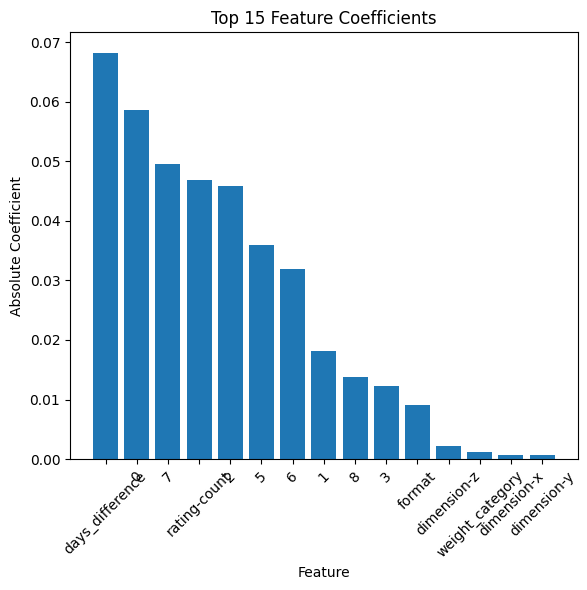

In [ ]:
# Get feature coefficients
coefficients = np.abs(lasso.coef_)
print(coefficients)

# Sort coefficients in descending order
indices = np.argsort(coefficients)[::-1]
print(indices)

# Visualize the top N important features
N = 15 # Adjust this value as needed
plt.figure(figsize=(6, 6))
plt.title("Top {} Feature Coefficients".format(N))
plt.bar(range(N), coefficients[indices][:N], align="center")
plt.xticks(range(N), df.columns[indices][:N], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Absolute Coefficient")
plt.tight_layout()
plt.show()

## Observation

This technique heped us by giving us the most relevant features list for predicting the rating-average class for books.

In [ ]:
# view the feature scores
import pandas as pd
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

bestsellers-rank    0.177830
days_difference     0.158897
rating-count        0.133989
dimension-z         0.119716
isbn13              0.096929
id                  0.096865
dimension-y         0.094142
dimension-x         0.093094
format              0.016989
weight_category     0.008654
language_encoded    0.002893
dtype: float64

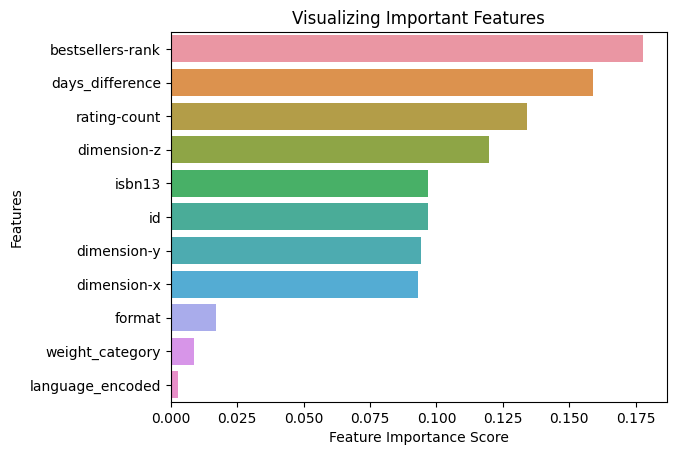

In [ ]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

This is another way through which we got to know which are the most relevant or important features while predicting the rating-average class for books.

In [ ]:
final_df = final_df[['days_difference', 'rating-count', 'bestsellers-rank']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_df, df["rating-avg"], random_state=42, test_size=0.20)

In [ ]:
size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((414791, 3), (103698, 3))

## Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
classifier = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model using the scaled training data
classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5247256456247951


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## Logistic Regression

In [ ]:
lr_classifier_ovr = LogisticRegression(multi_class='ovr', max_iter=10000, random_state=42)

# Train the model using the scaled training data
lr_classifier_ovr.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_lr_ovr = lr_classifier_ovr.predict(X_test_scaled)

# Calculate accuracy
accuracy_lr_ovr = accuracy_score(y_test, y_pred_lr_ovr)

print(f"Accuracy with Logistic Regression (OvR): {accuracy_lr_ovr}")

Accuracy with Logistic Regression (OvR): 0.519257844895755


In [ ]:
# Initialize the Logistic Regression classifier for OvO
lr_classifier_ovo = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=42)

# Train the model using the scaled training data
lr_classifier_ovo.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_lr_ovo = lr_classifier_ovo.predict(X_test_scaled)

# Calculate accuracy
accuracy_lr_ovo = accuracy_score(y_test, y_pred_lr_ovo)

print(f"Accuracy with Logistic Regression (OvO): {accuracy_lr_ovo}")


Accuracy with Logistic Regression (OvO): 0.5200003857355011


## KNN Classifier

In [ ]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1001)

# Train the model using the scaled training data
knn_classifier.fit(X_train_scaled, y_train)

# Predict the labels for the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Calculate accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy with KNN: {accuracy_knn}")

Accuracy with KNN: 0.5398368338830064


## Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 3: Initialize and Train the AdaBoost Classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)  # You can adjust the number of estimators
adaboost_classifier.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = adaboost_classifier.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 54.04%


## XGB Classifier

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Step 3: Initialize and Train the XGBoost Classifier
xgb_classifier = XGBClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
xgb_classifier.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = xgb_classifier.predict(X_test)

# Step 5: Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 55.37%


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(final_wala_df, df["rating-avg"], random_state=42, test_size=0.20)

In [ ]:

size_scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((414791, 11), (103698, 11))

## Decision Tree Classifier

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(random_state=12)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6018


## Stacking

>lr 0.509 (0.018)
>knn 0.501 (0.002)
>cart 0.485 (0.002)
>stacking 0.528 (0.004)


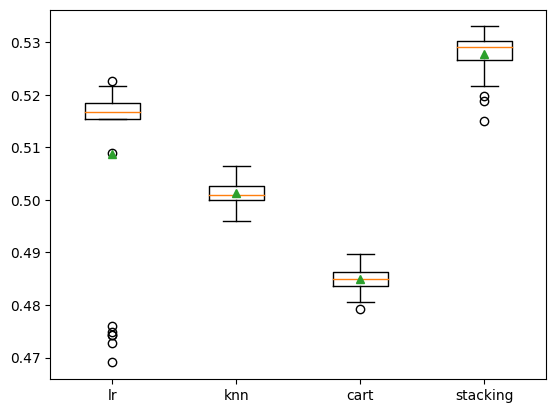

In [ ]:
# compare ensemble to each baseline classifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot


# get a stacking ensemble of models
def get_stacking():
 # define the base models
 level0 = list()
 level0.append(('lr', LogisticRegression()))
 level0.append(('knn', KNeighborsClassifier()))
 level0.append(('cart', DecisionTreeClassifier()))
 # define meta learner model
 level1 = LogisticRegression()
 # define the stacking ensemble
 model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
 return model

# get a list of models to evaluate
def get_models():
 models = dict()
 models['lr'] = LogisticRegression()
 models['knn'] = KNeighborsClassifier()
 models['cart'] = DecisionTreeClassifier()
 models['stacking'] = get_stacking()
 return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, final_df, df['rating-avg'])
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Observations

- The low accuracy in this problem persisted across various models due to the limited correlation between the chosen input features and the target variable.

- The Decision Tree classifier outperformed other models, achieving around 60% accuracy. Its strength lies in its capability to capture complex relationships within the data.

- Following closely in performance were the XGBoost, Adaboost, and K-Nearest Neighbors (KNN) classifiers.

- We also tried stacked generalization using logistic regression, K-Nearest Neighbors (KNN), and CART models, resulting in an accuracy of approximately 53%.